In [1]:
!pip install np_utils &> /dev/null

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder


In [3]:
import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
#from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
X_train = np.load('/content/drive/MyDrive/DSIM_Project_Monochannelsignal/extracted_features_X_train.npy')
X_test = np.load('/content/drive/MyDrive/DSIM_Project_Monochannelsignal/extracted_features_X_test.npy')
y_train = np.load('/content/drive/MyDrive/DSIM_Project_Monochannelsignal/extracted_features_y_train.npy')
y_test = np.load('/content/drive/MyDrive/DSIM_Project_Monochannelsignal/extracted_features_y_test.npy')

In [6]:
# Convert everything into numpy arrays for subsequent neural processing
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [7]:
enc = OneHotEncoder()

In [8]:
#X_train = np.reshape(X_train, newshape=((X_train.shape[0], 150, 182)))
#X_test = np.reshape(X_test, newshape=((X_test.shape[0], 150,182)))
y_train = enc.fit_transform(np.array(y_train).reshape(-1,1)).toarray()
y_test = enc.transform(np.array(y_test).reshape(-1,1)).toarray()

In [9]:
print(X_train.shape)
print(y_train.shape)
print(len(y_train[1]))

(4500, 27300)
(4500, 8)
8


In [10]:
# making our data compatible to model.
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4500, 27300, 1), (4500, 8), (500, 27300, 1), (500, 8))

In [11]:
input = keras.Input((X_train.shape[1], 1))
x = keras.layers.Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=((X_train.shape[1], 1)))(input)
x = keras.layers.MaxPooling1D(pool_size=5, strides = 2, padding = 'same')(x)

x = keras.layers.Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu')(x)
x = keras.layers.MaxPooling1D(pool_size=5, strides = 2, padding = 'same')(x)

x = keras.layers.Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu')(x)
x = keras.layers.MaxPooling1D(pool_size=5, strides = 2, padding = 'same')(x)
x = keras.layers.Dropout(0.2)(x)

x = keras.layers.Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu')(x)
x = keras.layers.MaxPooling1D(pool_size=5, strides = 2, padding = 'same')(x)
x = keras.layers.Dropout(0.2)(x)

x = keras.layers.Flatten()(x)
x = keras.layers.Dense(32, activation = 'relu')(x)
x = keras.layers.Dropout(0.3)(x)
output = keras.layers.Dense(8, activation = 'softmax')(x)
model = keras.Model(input, output)

In [12]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['categorical_accuracy'])

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 27300, 1)]        0         
                                                                 
 conv1d (Conv1D)             (None, 27300, 256)        1536      
                                                                 
 max_pooling1d (MaxPooling1  (None, 13650, 256)        0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 13650, 256)        327936    
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 6825, 256)         0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 6825, 128)         163968

In [14]:
history=model.fit(X_train, y_train, batch_size=64, epochs=40, validation_data=(X_test, y_test))

Epoch 1/40
71/71 [==============================] - 93s 1s/step - loss: 1.9563 - categorical_accuracy: 0.2264 - val_loss: 1.8617 - val_categorical_accuracy: 0.3580
Epoch 2/40
71/71 [==============================] - 64s 906ms/step - loss: 1.7465 - categorical_accuracy: 0.3284 - val_loss: 1.5556 - val_categorical_accuracy: 0.4660
Epoch 3/40
71/71 [==============================] - 64s 896ms/step - loss: 1.6118 - categorical_accuracy: 0.3927 - val_loss: 1.4824 - val_categorical_accuracy: 0.4600
Epoch 4/40
71/71 [==============================] - 64s 897ms/step - loss: 1.5200 - categorical_accuracy: 0.4396 - val_loss: 1.4565 - val_categorical_accuracy: 0.4940
Epoch 5/40
71/71 [==============================] - 63s 894ms/step - loss: 1.4073 - categorical_accuracy: 0.4749 - val_loss: 1.3782 - val_categorical_accuracy: 0.4900
Epoch 6/40
71/71 [==============================] - 64s 898ms/step - loss: 1.3033 - categorical_accuracy: 0.5224 - val_loss: 1.2532 - val_categorical_accuracy: 0.5460
E

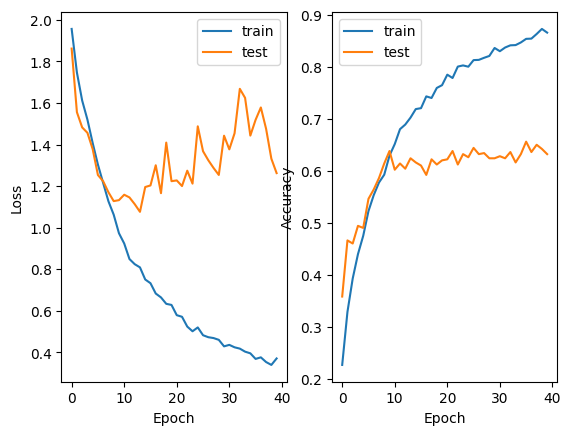

In [15]:
# Visualization of the learning curves
# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'])
# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])

In [16]:
pred_test = model.predict(X_test)
y_pred = enc.inverse_transform(pred_test)

y_test = enc.inverse_transform(y_test)

16/16 [==============================] - 6s 148ms/step


Confusion matrix:


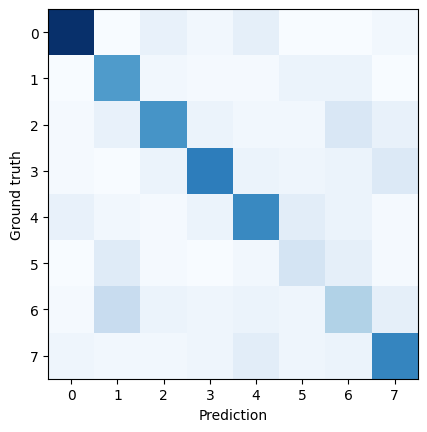

In [17]:
# Confusion matrix
print('Confusion matrix:')
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues);
plt.xlabel('Prediction');
plt.ylabel('Ground truth');

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Angry       0.86      0.82      0.84        82
        Calm       0.54      0.76      0.63        51
     Disgust       0.68      0.59      0.63        70
     Fearful       0.73      0.65      0.69        72
       Happy       0.63      0.65      0.64        68
     Neutral       0.35      0.40      0.38        30
         Sad       0.40      0.36      0.38        58
   Surprised       0.65      0.65      0.65        69

    accuracy                           0.63       500
   macro avg       0.61      0.61      0.60       500
weighted avg       0.64      0.63      0.63       500



In [19]:
joblib.dump(model, '/content/drive/My Drive/DSIM_Project_Monochannelsignal/cnn_model.joblib') # Saving the model

['/content/drive/My Drive/DSIM_Project_Monochannelsignal/cnn_model.joblib']